In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
abb = pd.read_csv('airbnb_cleaned.csv')

In [4]:
abb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,48150,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04095,-155.43251,Entire home/apt,85,2,42,22/03/20,0.45,2,365,Hawaii
1,48152,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43119,-155.88079,Entire home/apt,85,5,168,18/03/20,1.30,3,242,Hawaii
2,48153,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56413,-155.96347,Entire home/apt,239,6,20,22/03/20,0.24,3,287,Hawaii
3,48154,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88305,-159.47372,Entire home/apt,92,3,143,10/08/20,1.03,1,116,Hawaii
4,48155,5434,Kauai Ocean View 3 Story Tiki Tower Princeville,7984,Ahlea,Kauai,North Shore Kauai,22.21972,-159.46958,Entire home/apt,175,2,107,16/03/20,0.80,2,302,Hawaii


Text(0.5, 1.0, 'Normalized data')

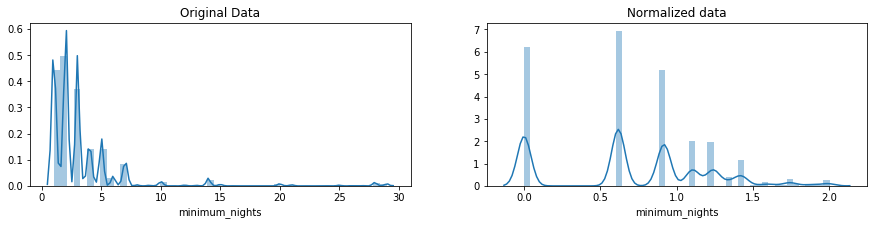

In [12]:

# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_minimum_nights = abb.minimum_nights > 0

# get only positive pledges (using their indexes)
positive_nights = abb.minimum_nights.loc[index_of_minimum_nights]

# normalize the pledges (w/ Box-Cox)
normalized_nights = pd.Series(stats.boxcox(positive_nights)[0], 
                               name='minimum_nights', index=positive_nights.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_nights, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_nights, ax=ax[1])
ax[1].set_title("Normalized data")

Text(0.5, 1.0, 'Normalized data')

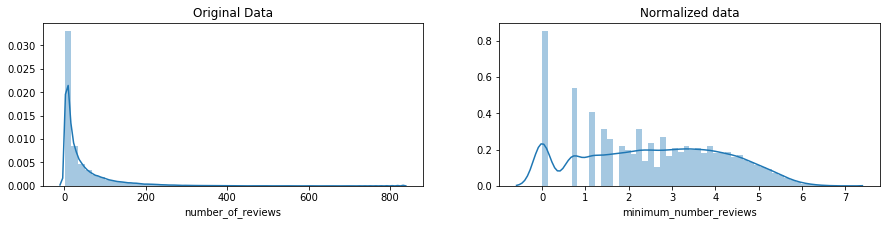

In [13]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_number_reviews = abb.number_of_reviews > 0

# get only positive pledges (using their indexes)
positive_number_reviews = abb.number_of_reviews.loc[index_of_number_reviews]

# normalize the pledges (w/ Box-Cox)
normalized_number_reviews = pd.Series(stats.boxcox(positive_number_reviews)[0], 
                               name='minimum_number_reviews', index=positive_number_reviews.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_number_reviews, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_number_reviews, ax=ax[1])
ax[1].set_title("Normalized data")